# Customer buying pattenrs
Iga Świtalska

## Introduction

The purpose of this project is to analyse customer buying patterns. Data came from ubiqum code academy and relates to online and in-store sales of electronic components. For each transaction was recorded region, amount spent, number of items purchased, age of customer and the information if sale was in-store or online.

Questions we are going to answer are:
* Do customers in different regions spend more per transaction? Which regions spend the most/least?
* Is there a relationship between number of items purchased and amount spent?
* Are there any other insights about customer purchasing behaviour?

For our analysis we will use descriptive statistics, Pearson correlation, histograms, boxplots, scatter plots, and heatmap.

## Obtaining and preprocessing Data

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import expon, kstest, kurtosis

In [5]:
# obtaing data
data = pd.read_csv('Demographic_Data.csv')

In [6]:
# the first 5 rows of the data frame
data.head()

,in-store,age,items,amount,region
0,0,37,4,281.03,2
1,0,35,2,219.51,2
2,1,45,3,1525.70,4
3,1,46,3,715.25,3
4,1,33,4,1937.50,1


In [7]:
# basic descriptive statistics
data.describe()

,in-store,age,items,amount,region
count,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000
mean,0.500000,45.757925,4.504975,835.919670,2.675000
std,0.500003,15.715679,2.061238,721.273736,1.126672
min,0.000000,18.000000,1.000000,5.004700,1.000000
25%,0.000000,33.000000,3.000000,285.140000,2.000000
50%,0.500000,45.000000,4.000000,582.315000,3.000000
75%,1.000000,56.000000,6.000000,1233.700000,4.000000
max,1.000000,85.000000,8.000000,3000.000000,4.000000


In [8]:
# information about type of variables,non-null values and memory usage
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   in-store  80000 non-null  int64  
 1   age       80000 non-null  int64  
 2   items     80000 non-null  int64  
 3   amount    80000 non-null  float64
 4   region    80000 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 3.1 MB


In [9]:
# detection of missing values
print(data.isnull().sum())

in-store    0
age         0
items       0
amount      0
region      0
dtype: int64


In [10]:
# removing duplicates
data = data.drop_duplicates()

In [11]:
data.describe()

,in-store,age,items,amount,region
count,79979.000000,79979.000000,79979.000000,79979.000000,79979.000000
mean,0.500006,45.758512,4.505133,835.825727,2.674915
std,0.500003,15.715158,2.061250,721.263650,1.126642
min,0.000000,18.000000,1.000000,5.004700,1.000000
25%,0.000000,33.000000,3.000000,285.120000,2.000000
50%,1.000000,45.000000,4.000000,582.140000,3.000000
75%,1.000000,56.000000,6.000000,1233.400000,4.000000
max,1.000000,85.000000,8.000000,3000.000000,4.000000


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79979 entries, 0 to 79999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   in-store  79979 non-null  int64  
 1   age       79979 non-null  int64  
 2   items     79979 non-null  int64  
 3   amount    79979 non-null  float64
 4   region    79979 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 3.7 MB


We can observe that there are no significant differences between data with and without duplicates.

For facilitation of future analysis we will change type of 'region' and 'in-store' data. 

We will also create individual variables for each column of data frame.

In [13]:
data['region'] = data['region'].map({1:'north',2:'south',3:'east',4:'west'})

In [14]:
data['in-store'] = data['in-store'].map({1:True,0:False})

In [15]:
in_store = data.get('in-store')
age = data.get('age')
items = data.get('items')
amount = data.get('amount')
region = data.get('region')

## Age distribution

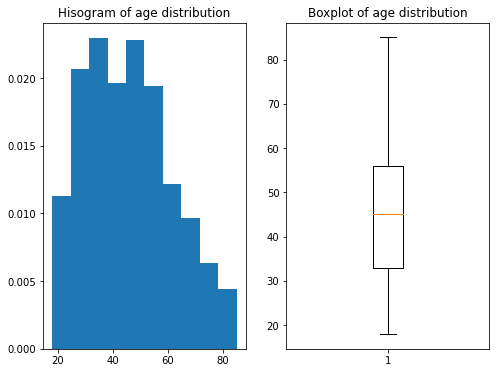

In [16]:
# histogram and boxplot
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(8,6))

ax1.hist(age,density=True,bins=10)
ax1.set_title('Hisogram of age distribution')
ax2.boxplot(age)
ax2.set_title('Boxplot of age distribution')
plt.show()

In [17]:
# basic descriptive statistics
age.describe()

count    79979.000000
mean        45.758512
std         15.715158
min         18.000000
25%         33.000000
50%         45.000000
75%         56.000000
max         85.000000
Name: age, dtype: float64

In [18]:
# other statistics
print('kurtosis: ' + str(age.kurt()))
print('skewness: ' + str(age.skew()))

kurtosis: -0.593463388780564
skewness: 0.37835480017781364


The mean is a little bit bigger than the median, also the measure of skewness is positive which testifies a right skewness of data distribution. Kurtosis is negative, so age distribution is more oblate than normal distribution.

Futhermore we can obseve that the distribution is bimodal.

## Amount distribution

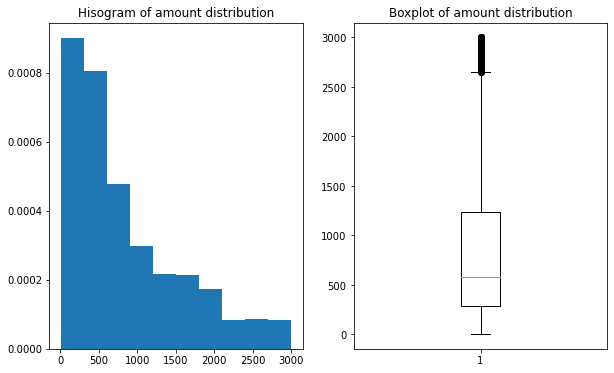

In [19]:
# histogram and boxplot
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,6))

ax1.hist(amount,density=True)
ax1.set_title('Hisogram of amount distribution')
ax2.boxplot(amount)
ax2.set_title('Boxplot of amount distribution')
plt.show()

In [20]:
# basic descriptive statistics
amount.describe()

count    79979.000000
mean       835.825727
std        721.263650
min          5.004700
25%        285.120000
50%        582.140000
75%       1233.400000
max       3000.000000
Name: amount, dtype: float64

In [21]:
# other statistics
print('kurtosis: ' + str(amount.kurt()))
print('skewness: ' + str(amount.skew()))

kurtosis: 0.42025956452930746
skewness: 1.1233200112582495


In this case the mean is much bigger than the median, also the measure of skewness is positive, which once more testifies a right skewness of data distribution. In the histogram and boxplot we can see that there are some outliers.

Kurtosis is positive, so age distribution is less oblate than normal distribution.

## Items distribution

In [22]:
# basic descriptive statistics
items.describe()

count    79979.000000
mean         4.505133
std          2.061250
min          1.000000
25%          3.000000
50%          4.000000
75%          6.000000
max          8.000000
Name: items, dtype: float64

In [23]:
# number of transactions for each number of items purchased
data.groupby('items')['items'].count()

items
1     5699
2    11284
3    11486
4    11594
5    11233
6    11519
7    11376
8     5788
Name: items, dtype: int64

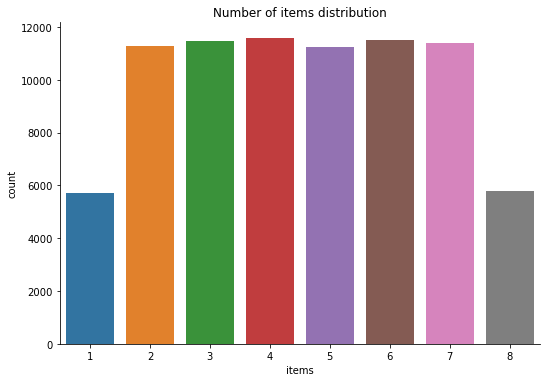

In [24]:
sns.catplot(x='items',y=None,data=data, kind="count", aspect=1.5)
plt.title('Number of items distribution')
plt.show()

The items distributoin it's similar to the uniform distribution. Only the maximum and the minimum of data stand out. 

Considering the barplot we can say that customers prefer to buy from 2 to 7 items.

## Region Analytics

How many transaction for each region?

In [25]:
# number of transactions for each region
data.groupby('region')['region'].count()

region
east     18000
north    15997
south    19994
west     25988
Name: region, dtype: int64

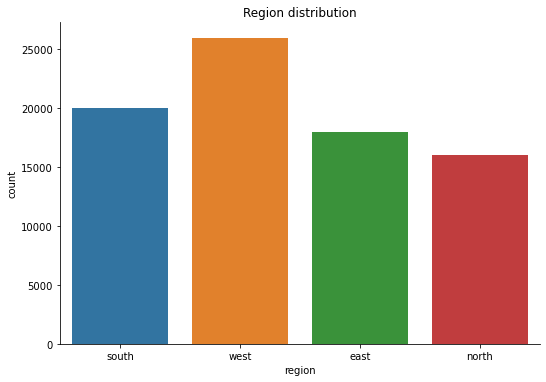

In [26]:
sns.catplot(x='region',y=None,data=data, kind="count", aspect=1.5)
plt.title('Region distribution')
plt.show()

The most of transactions are made in the western part and the least in the North.

#### Is there a relation between between region and in-store purchases?

In the figure below we can see that in the South people buy only online and in North they only buy from a store.

That's interesting and may be the result of lack of stores in the South and weaker internet access in the North.

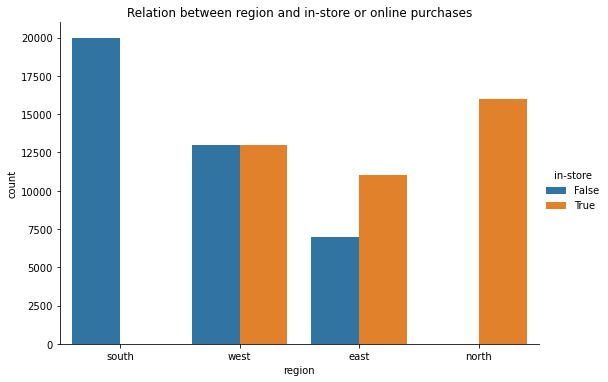

In [27]:
sns.catplot(x='region',y=None,hue="in-store",data=data, kind="count", aspect=1.5)
plt.title('Relation between region and in-store or online purchases')
plt.show()

#### Do customers in different regions spend more per transaction?

Yes, they do. On average, they spend six times more in the West (the region with the greatest mean amount) than in the South (the region with the least mean amount). The minimum value is similar for the East, the North and the West, but the maximum value is bigerr for the western and easten part.

Furthermore we can see that despite the positive skewness for all-region data the distribution of data is symmetrical for the southern part. The histogram and the mean akin to median proclaim that.

In [28]:
region_amount = data.groupby(['region'])['amount']

In [29]:
region_amount.describe()

,count,mean,std,min,25%,50%,75%,max
region,,,,,,,,
east,18000.0,917.969637,751.409992,50.1320,372.9975,697.825,1134.550,3000.00
north,15997.0,744.990939,492.989025,50.0500,358.9900,662.860,973.490,1999.80
south,19994.0,252.097741,142.676946,5.0047,129.6300,250.205,374.920,499.94
west,25988.0,1283.938357,756.302513,50.6000,659.4575,1230.250,1812.775,3000.00


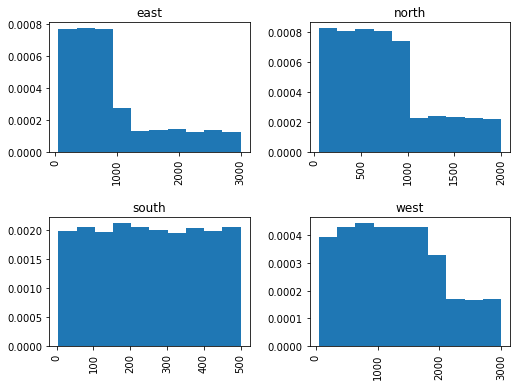

In [30]:
data['amount'].hist(by=data['region'],figsize=(8,6),density=True)
plt.show()

#### Do customers in different regions buy more or less items?

For each region descriptive statistics are similar. 

We also can see that the majority of customers buy from 2 to 7 items. 

In [31]:
region_items = data.groupby(['region'])['items']

In [32]:
region_items.describe()

,count,mean,std,min,25%,50%,75%,max
region,,,,,,,,
east,18000.0,4.494000,2.058095,1.0,3.0,4.0,6.0,8.0
north,15997.0,4.510283,2.050402,1.0,3.0,4.0,6.0,8.0
south,19994.0,4.512804,2.065467,1.0,3.0,5.0,6.0,8.0
west,25988.0,4.503771,2.066920,1.0,3.0,5.0,6.0,8.0


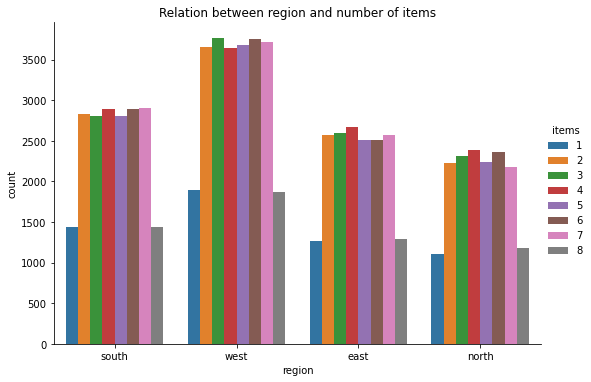

In [33]:
sns.catplot(x='region',y=None,hue="items",data=data, kind="count", aspect=1.5)
plt.title('Relation between region and number of items')
plt.show()

## In-store analytics

In [34]:
data.groupby('in-store')['in-store'].count()

in-store
False    39989
True     39990
Name: in-store, dtype: int64

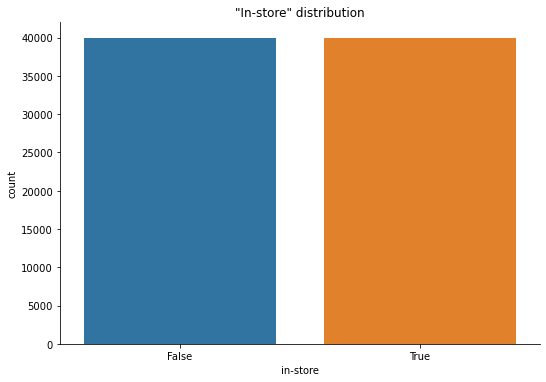

In [35]:
sns.catplot(x='in-store',y=None,data=data, kind="count", aspect=1.5)
plt.title('"In-store" distribution')
plt.show()

There are as much in-store purchases as online purchases.

#### Is there a relation between amount spent and in-store purchases?

In [36]:
in_store_amount = data.groupby(['in-store'])['amount']

In [37]:
in_store_amount.describe()

,count,mean,std,min,25%,50%,75%,max
in-store,,,,,,,,
False,39989.0,897.546576,880.146928,5.0047,228.1500,441.89,1542.7,3000.0
True,39990.0,774.106421,508.118520,50.0500,368.6225,688.18,1024.4,1999.9


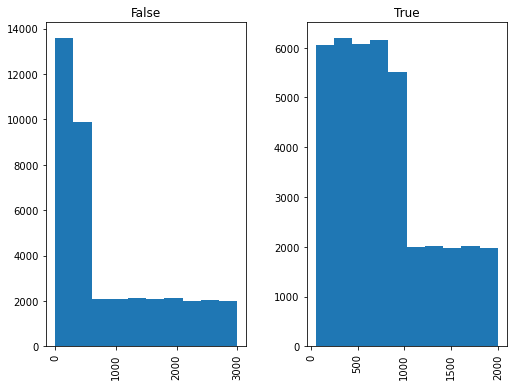

In [38]:
data['amount'].hist(by=data['in-store'],figsize=(8,6))
plt.show()

We can observe an interesting thing. Customers spend averagely less money buying in-store. Also standard deviation and interquartile range are bigger for in-store purchases.

### What about the number of items?

In [39]:
in_store_items = data.groupby(['in-store'])['items']

In [40]:
in_store_items.describe()

,count,mean,std,min,25%,50%,75%,max
in-store,,,,,,,,
False,39989.0,4.513166,2.066456,1.0,3.0,5.0,6.0,8.0
True,39990.0,4.497099,2.056026,1.0,3.0,4.0,6.0,8.0


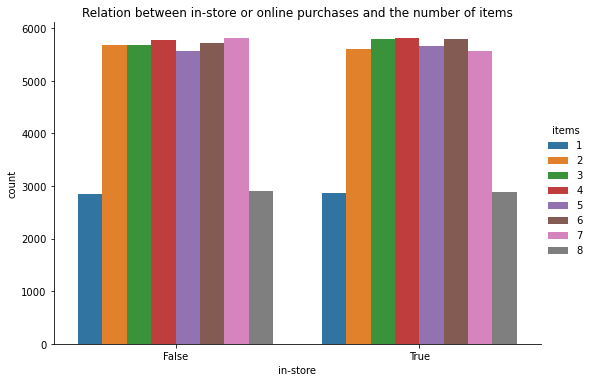

In [41]:
sns.catplot(x='in-store',y=None,hue="items",data=data, kind="count", aspect=1.5)
plt.title('Relation between in-store or online purchases and the number of items')
plt.show()

In this case descriptive statistics are also similar for in-store and online sales. 

## Linear correlations (Pearson correlation)

In [42]:
# creation of correlation matrix (Pearson correlation)
corr_matrix_p = data.corr(method='pearson')
print(corr_matrix_p)

          in-store       age     items    amount
in-store  1.000000 -0.178180 -0.003897 -0.085573
age      -0.178180  1.000000  0.000657 -0.282033
items    -0.003897  0.000657  1.000000  0.000384
amount   -0.085573 -0.282033  0.000384  1.000000


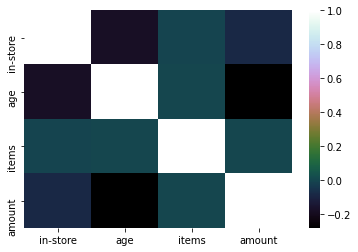

In [43]:
# heatmap of correlation matrix
sns.heatmap(corr_matrix_p,cmap="cubehelix")
plt.show()

### Correlation between amount and number of items

The Pearson correlation is approximately zero, so there is no linear correlation between amount and number of items purchased.

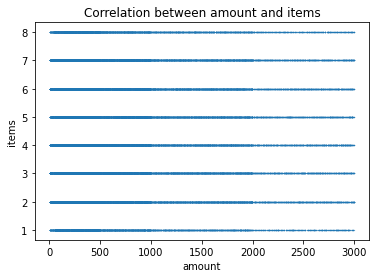

In [44]:
plt.scatter(amount, items, marker='.', s=0.5**2)
plt.title('Correlation between amount and items')
plt.xlabel('amount')
plt.ylabel('items')
plt.show()

### Correlation between age and number of items

This time the Pearson correlation is is also near to zero, which implies that there is no linear correlation between age and number of items purchased.

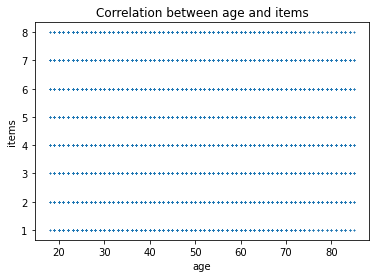

In [45]:
plt.scatter(age, items, marker='.', s=0.5**2)
plt.title('Correlation between age and items')
plt.xlabel('age')
plt.ylabel('items')
plt.show()

### Correlation between age and amount spend

In this case wy can see a little negative correlation between variables (-0.282033). 

It means, the older the customer is, the less he spends.

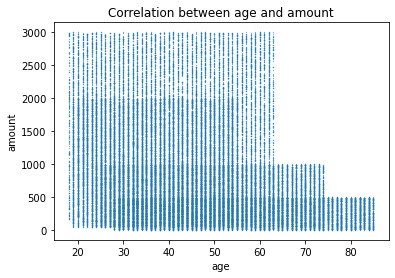

In [46]:
plt.scatter(age, amount, marker='.', s=0.5**2)
plt.title('Correlation between age and amount')
plt.xlabel('age')
plt.ylabel('amount')
plt.show()

## Conclusion

To conclude, due to our analysis we can say that number of items purchased does not depend on region, amount spent, age and in-store or online sales. Regardless of other variables customers usually buy from 2 to 7 items.

Considering relation of region with other variables, we can reach a conclusion that the West is the region with the most number of transactions and the most amount spent per transaction. 
In the North, where customers buy only in-store are the least of transactions. In the southtern part, where are only online purchases, people spend the least per transation. That's interesting, because considering all regions customers spend averagely more money online.

The last thing we can observe is correlation between age of clients and amount they spend per transaction. We can see that older people spend less than younger people.